In [51]:
import numpy as np
import cv2 

def conv_to_hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def conv_to_hsv_hist(img):
    hsv_img = conv_to_hsv(img)
    hist_img = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])
    cv2.normalize(hist_img,hist_img,0,255,cv2.NORM_MINMAX)
    return hist_img

reference = 'barrel.png'
target_img_name = 'vid_frame.png' 
img = cv2.imread(reference)
target_img = cv2.imread(target_img_name)
img_hist = conv_to_hsv_hist(img)

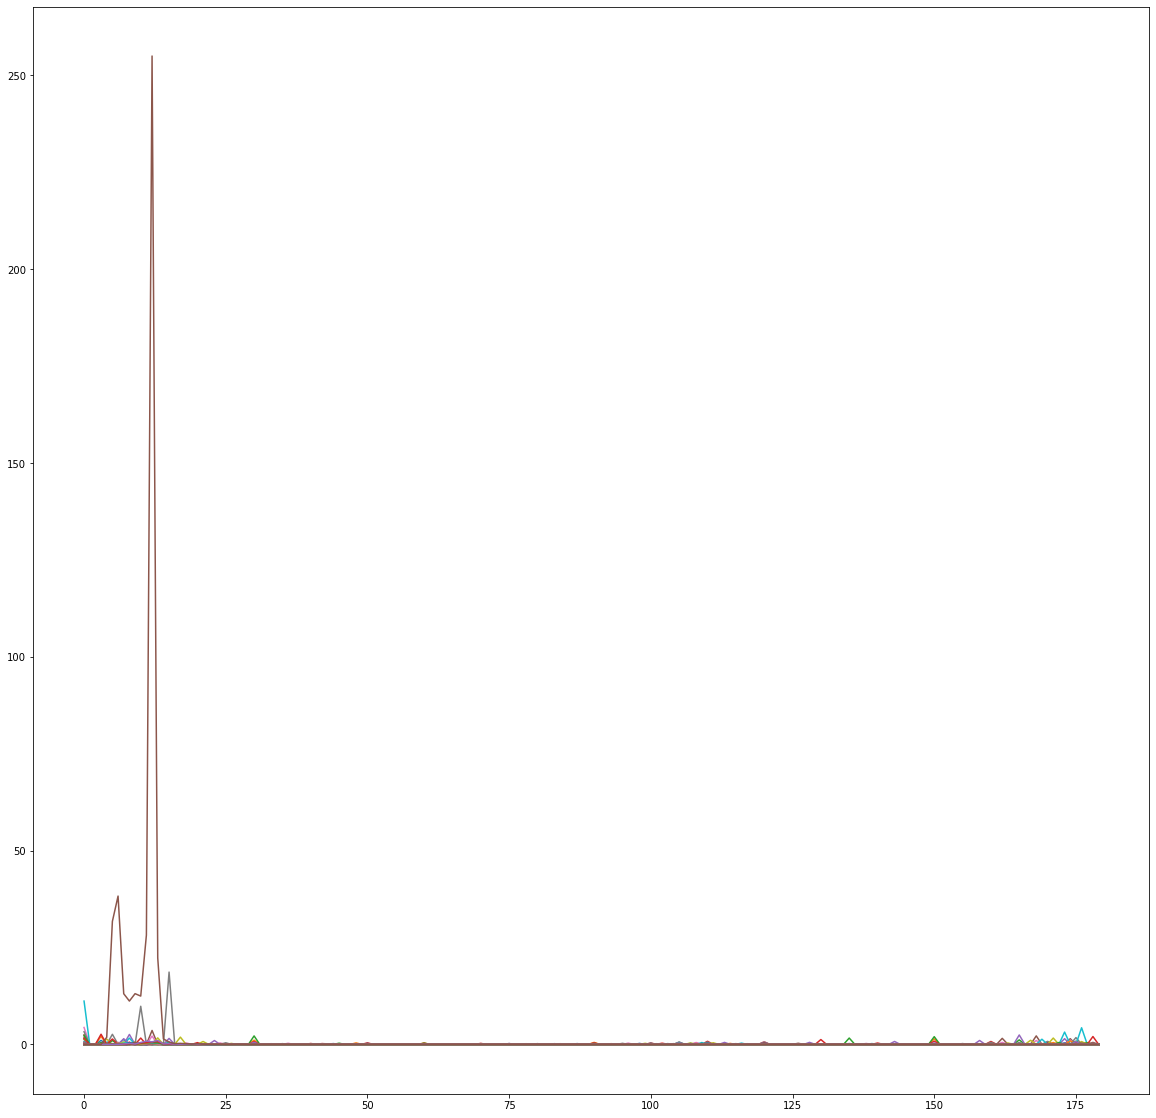

In [52]:
plt.figure(figsize=(20,20))
plt.plot(img_hist);

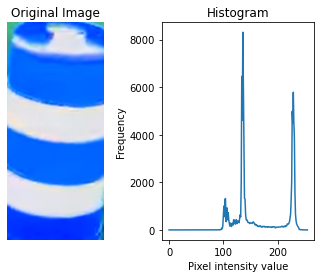

In [42]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('barrel.png',1)
plt.subplot(121),plt.axis("off"),plt.title("Original Image"),plt.imshow(img,cmap='gray')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram')
plt.show()

In [5]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cap = cv2.VideoCapture('matching_cones.mp4')

In [6]:
def find_barrel(img):
    frame = conv_to_hsv(img)
    res = cv2.calcBackProject([frame],[0,1],img_hist,[0,180,0,256],1)
    cv2.filter2D(res,-1,disc,res)
    cv2.normalize(res,res,0,255,cv2.NORM_MINMAX)
    ret,thresh = cv2.threshold(res,50,255,0)
    final = cv2.merge((thresh,thresh,thresh))
    result = cv2.bitwise_or(img,final)
    return result


In [54]:
result = find_barrel(target_img)
cv2.imwrite('required_image.jpg', result)
cv2.imshow('check', result)
cv2.waitKey()


-1

In [8]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result = find_barrel(frame)
    cv2.imshow('match', result)
    if cv2.waitKey(25) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()